In [6]:
import csv
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [7]:
def mm_cross_simple(df,col_price,mm_short,mm_long):
    mm_short_name = str(mm_short) + 'MA'
    mm_long_name = str(mm_long) + 'MA'
    signal_mm = mm_short_name + mm_long_name
    df[mm_short_name] = df[col_price].rolling(window=mm_short).mean()
    df[mm_long_name] = df[col_price].rolling(window=mm_long).mean()
    df[signal_mm] = np.where(df[mm_short_name] > df[mm_long_name], 1,-1)
    return df

In [8]:
df = pd.read_csv('sample_data.csv', delimiter = ',')   #price data

In [14]:
def return_cum_strat_last_el(df, mm_short, mm_long, mm_short2, mm_long2, plot_return=False):
    
    #col title in the df
    signal_ma = str(mm_short) + 'MA' + str(mm_long) + 'MA'
    signal_ma1 = str(mm_short2) + 'MA' + str(mm_long2) + 'MA'
    tc = .002      #transaction cost
    
    df['price'] = df['price'].astype(float)
    df['date'] = df['time']/1000                      #binance time is in milliseconds-> transform in seconds
    df['date'] = pd.to_datetime(df['date'], unit='s') #format binance date in readable date 

    #signal calcul
    df = mm_cross_simple(df,'price', mm_short, mm_long)     #add in df above: short_ma, long_ma, signal_mm
    df = mm_cross_simple(df,'price', mm_short2, mm_long2)   #add in df above: short_ma, long_ma, signal_mm
    
    df['signal'] = (df[signal_ma] + df[signal_ma1])/2                          #create df signal: sell if -1 and buy if +1
    df['signal_chg'] = np.where(df['signal'] != df['signal'].shift(1), 1,0)    #count signal change, then number of trades
    df['tc'] = df['signal_chg'] * tc                                           #calc transactions cost
    df['tc'] = df['tc'].cumsum()
    
    #return calculations
    df['return'] = (df['price'] / df['price'].shift(1))-1                      #calc returns per minute for the series
    df['cum_return'] = (1 + df['return']).cumprod() - 1                        #calc cumulated returns for the series
    df['strat_ret'] = df['return'] * df ['signal']                             #calc strategy returns per minute for the series
    df['cum_strat_ret'] = (1 + df['strat_ret']).cumprod() - 1                  #calc strategy cumulated returns
    df['cum_strat_ret_tc'] = df['cum_strat_ret'] - df['tc']                    #remove transactions costs

    if plot_return:
        df.plot(x = 'date', y='cum_strat_ret_tc', figsize=(20,5))                               #graph the strategy returns 
    
    return df['cum_strat_ret_tc'].iloc[-1]                     # last element of Series df[..]

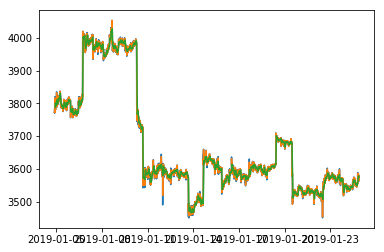

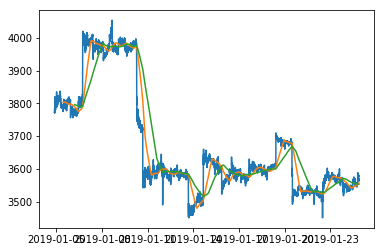

In [15]:
s=2
l=50
s2=800
l2=1900
return_cum_strat_last_el(df, s, l, s2, l2)

plt.plot(df['date'],df['price'])
plt.plot(df['date'],df[str(s)+'MA'])
plt.plot(df['date'],df[str(l)+'MA'])
plt.show()

plt.plot(df['date'],df['price'])
plt.plot(df['date'],df[str(s2)+'MA'])
plt.plot(df['date'],df[str(l2)+'MA'])
plt.show()

In [16]:
# GENERATE RESULTS

# arguments
print_progress=True 
write_progress=True
print_result=False

# initialise data structures and helpers
a_dict = {}
short_values = []
long_values = []
cum_strat_values = []
try:
    os.remove('running_progress.csv')
except:
    pass

# run through combinations
for short in range(2,101, 2):
    for long in range(5,201, 5):
        if short < long and long - short < 10:
            for short2 in range(50,201, 10):
                for long2 in range(100,501, 25):
                    if short2 < long2:
                        last_cum_strat_value = return_cum_strat_last_el(df, short, long, short2, long2)
                        a_dict[last_cum_strat_value] = (short, long, short2, long2)
                        
                        if print_progress:
                            print(
                                'last_el_df_cum_strat:{},'.format(last_cum_strat_value) +
                                ' short:{},'.format(short) +
                                ' long:{},'.format(long) +
                                ' short2:{},'.format(short2) +
                                ' long2:{},'.format(long2))
                        if write_progress:
                            with open('running_progress.csv', 'a') as f:
                                writer = csv.writer(f)
                                writer.writerow([last_cum_strat_value, short, long, short2, long2])
if print_result:
    maximum = max(a_dict)
    print(
        'The highest cum_strat_value is {}, with'.format(maximum) +
        ' mm_short={},'.format(a_dict[maximum][0]) +
        ' mm_long={},'.format(a_dict[maximum][1]) +
        ' mm_short2={},'.format(a_dict[maximum][2]) +
        ' mm_long2={}'.format(a_dict[maximum][3]))

last_el_df_cum_strat:-7.76063195014272, short:2, long:5, short2:50, long2:100,
last_el_df_cum_strat:-7.703906506202567, short:2, long:5, short2:50, long2:125,
last_el_df_cum_strat:-7.548010653011831, short:2, long:5, short2:50, long2:150,
last_el_df_cum_strat:-7.341714587432866, short:2, long:5, short2:50, long2:175,
last_el_df_cum_strat:-7.399836863387134, short:2, long:5, short2:50, long2:200,
last_el_df_cum_strat:-7.188639462626705, short:2, long:5, short2:50, long2:225,
last_el_df_cum_strat:-7.285314244207854, short:2, long:5, short2:50, long2:250,
last_el_df_cum_strat:-7.142867308174429, short:2, long:5, short2:50, long2:275,
last_el_df_cum_strat:-7.272534753421565, short:2, long:5, short2:50, long2:300,
last_el_df_cum_strat:-7.332774516734646, short:2, long:5, short2:50, long2:325,
last_el_df_cum_strat:-7.160872261166155, short:2, long:5, short2:50, long2:350,
last_el_df_cum_strat:-7.155201316455695, short:2, long:5, short2:50, long2:375,
last_el_df_cum_strat:-7.187185226179636, 

last_el_df_cum_strat:-7.546252689457529, short:2, long:5, short2:110, long2:200,
last_el_df_cum_strat:-7.4325691424337155, short:2, long:5, short2:110, long2:225,
last_el_df_cum_strat:-7.452775355262303, short:2, long:5, short2:110, long2:250,
last_el_df_cum_strat:-7.500281368482916, short:2, long:5, short2:110, long2:275,
last_el_df_cum_strat:-7.584994573090694, short:2, long:5, short2:110, long2:300,
last_el_df_cum_strat:-7.598113910074228, short:2, long:5, short2:110, long2:325,
last_el_df_cum_strat:-7.578297574970318, short:2, long:5, short2:110, long2:350,
last_el_df_cum_strat:-7.632381191074348, short:2, long:5, short2:110, long2:375,
last_el_df_cum_strat:-7.597087011164017, short:2, long:5, short2:110, long2:400,
last_el_df_cum_strat:-7.555065008470362, short:2, long:5, short2:110, long2:425,
last_el_df_cum_strat:-7.490247480754269, short:2, long:5, short2:110, long2:450,
last_el_df_cum_strat:-7.51376936941538, short:2, long:5, short2:110, long2:475,
last_el_df_cum_strat:-7.4789

last_el_df_cum_strat:-7.3851075486612165, short:2, long:5, short2:180, long2:225,
last_el_df_cum_strat:-7.625216104130534, short:2, long:5, short2:180, long2:250,
last_el_df_cum_strat:-7.681159443400872, short:2, long:5, short2:180, long2:275,
last_el_df_cum_strat:-7.484687739913142, short:2, long:5, short2:180, long2:300,
last_el_df_cum_strat:-7.485951920354835, short:2, long:5, short2:180, long2:325,
last_el_df_cum_strat:-7.521458278213461, short:2, long:5, short2:180, long2:350,
last_el_df_cum_strat:-7.539722263403655, short:2, long:5, short2:180, long2:375,
last_el_df_cum_strat:-7.543772733643255, short:2, long:5, short2:180, long2:400,
last_el_df_cum_strat:-7.515144523062815, short:2, long:5, short2:180, long2:425,
last_el_df_cum_strat:-7.539610759820285, short:2, long:5, short2:180, long2:450,
last_el_df_cum_strat:-7.468464785231421, short:2, long:5, short2:180, long2:475,
last_el_df_cum_strat:-7.357150727693009, short:2, long:5, short2:180, long2:500,
last_el_df_cum_strat:-7.801

last_el_df_cum_strat:-5.511542709828232, short:2, long:10, short2:80, long2:450,
last_el_df_cum_strat:-5.5104612180476416, short:2, long:10, short2:80, long2:475,
last_el_df_cum_strat:-5.516556290610655, short:2, long:10, short2:80, long2:500,
last_el_df_cum_strat:-6.350134552564457, short:2, long:10, short2:90, long2:100,
last_el_df_cum_strat:-6.036649708978295, short:2, long:10, short2:90, long2:125,
last_el_df_cum_strat:-5.895822250729483, short:2, long:10, short2:90, long2:150,
last_el_df_cum_strat:-5.701900911577867, short:2, long:10, short2:90, long2:175,
last_el_df_cum_strat:-5.631838431523065, short:2, long:10, short2:90, long2:200,
last_el_df_cum_strat:-5.416913690949618, short:2, long:10, short2:90, long2:225,
last_el_df_cum_strat:-5.355248975913147, short:2, long:10, short2:90, long2:250,
last_el_df_cum_strat:-5.49462236820743, short:2, long:10, short2:90, long2:275,
last_el_df_cum_strat:-5.456358458315301, short:2, long:10, short2:90, long2:300,
last_el_df_cum_strat:-5.4822

KeyboardInterrupt: 

In [76]:
# PRINT COMBINATION FOR MAXIMUM RETURN
maximum = max(a_dict)
print(
    'The highest cum_strat_value is {}, with'.format(maximum) +
    ' mm_short={},'.format(a_dict[maximum][0]) +
    ' mm_long={},'.format(a_dict[maximum][1]) +
    ' mm_short2={},'.format(a_dict[maximum][2]) +
    ' mm_long2={}'.format(a_dict[maximum][3]))

The highest cum_strat_value is -7.11209619601742, with mm_short=2, mm_long=5, mm_short2=70, mm_long2=225


In [17]:
df

,Unnamed: 0,0,1,2,3,price,5,time,7,8,...,200MA325MA,200MA350MA,200MA375MA,200MA400MA,200MA425MA,200MA450MA,200MA475MA,200MA500MA,10MA,2MA10MA
0,0,1546635660000,3768.66,3772.60,3763.00,3772.60,27.522187,1546635719999,103712.169075,212,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
1,1,1546635720000,3772.60,3773.93,3767.00,3772.51,26.013244,1546635779999,98092.874488,147,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
2,2,1546635780000,3772.51,3779.12,3769.13,3772.78,50.161564,1546635839999,189340.569300,222,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
3,3,1546635840000,3769.79,3774.44,3769.68,3770.72,12.667278,1546635899999,47779.401801,135,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
4,4,1546635900000,3770.54,3774.66,3770.19,3773.31,13.656076,1546635959999,51508.569577,121,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
5,5,1546635960000,3773.30,3778.49,3773.30,3776.41,23.186758,1546636019999,87560.028190,161,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
6,6,1546636020000,3776.41,3780.61,3774.51,3778.33,63.982927,1546636079999,241716.410917,294,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
7,7,1546636080000,3778.33,3778.33,3768.90,3774.40,30.844351,1546636139999,116402.624465,199,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
8,8,1546636140000,3774.97,3779.52,3773.65,3778.37,28.292219,1546636199999,106873.241678,132,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,-1
9,9,1546636200000,3778.37,3780.00,3775.93,3775.96,28.972181,1546636259999,109484.197773,150,...,-1,-1,-1,-1,-1,-1,-1,-1,3774.539,1
